<a href="https://colab.research.google.com/github/Vineet2107/Deep-Neural-Networks-with-PyTorch/blob/main/Assignment1_CE784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_path = '/content/drive/MyDrive/mod_ravelling_dataset/train'
test_path = '/content/drive/MyDrive/mod_ravelling_dataset/test'

In [4]:
Non_raveling_data = '/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling'
Raveling_data = '/content/drive/MyDrive/mod_ravelling_dataset/train/Raveling'

In [5]:
Non_raveling_data

'/content/drive/MyDrive/mod_ravelling_dataset/train/Non_raveling'

In [6]:
list_nr = os.listdir(Non_raveling_data)
list_r = os.listdir(Raveling_data)

In [7]:
list_nr[0]

'image466.jpg'

In [8]:
#list_r = (os.listdir(Raveling))

In [9]:
#list_r[:5]

In [10]:
img = []

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


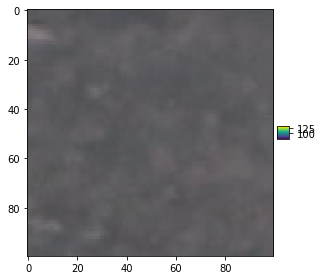

In [11]:
img_nr = []

for i in range(len(list_nr)):
  img = io.imread(os.path.join(Non_raveling_data,list_nr[i]))
  img_nr.append(np.array(img))
  io.imshow(img)


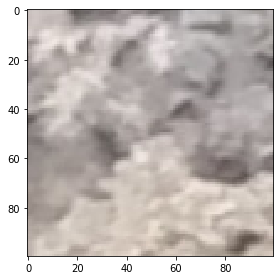

In [12]:
img_r = []

for i in range(len(list_r)):
  img = io.imread(os.path.join(Raveling_data,list_r[i]))
  img_r.append(np.array(img))
  io.imshow(img)

In [13]:
print(len(img_nr))
print(len(img_r))

351
349


In [14]:
img_nr = np.array(img_nr)
img_r = np.array(img_r)

In [15]:
print(img_nr.shape)
print(img_r.shape)

(351, 100, 100, 3)
(349, 100, 100, 3)


In [16]:
#def mean(arr[][]):


In [60]:
rows, cols = (351, 19)
imgprop_nr = [[0]*cols]*rows
print(imgprop_nr)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [61]:
rows, cols = (349, 19)
imgprop_r = [[0]*cols]*rows
print(imgprop_r)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [62]:


from itertools import chain
for i in range(len(img_nr)):
  imgprop_nr[i][0] = np.mean(img_nr[i][:,:,0])
  imgprop_nr[i][1] = np.std(img_nr[i][:,:,0])
  imgprop_nr[i][2] = kurtosis((img_nr[i][:,:,0]).flatten())
  imgprop_nr[i][3] = skew((img_nr[i][:,:,0]).flatten())
  imgprop_nr[i][4] = np.mean(img_nr[i][:,:,1])
  imgprop_nr[i][5] = np.std(img_nr[i][:,:,1])
  imgprop_nr[i][6] = kurtosis((img_nr[i][:,:,1]).flatten())
  imgprop_nr[i][7] = skew((img_nr[i][:,:,1]).flatten())
  imgprop_nr[i][8] = np.mean(img_nr[i][:,:,2])
  imgprop_nr[i][9] = np.std(img_nr[i][:,:,2])
  imgprop_nr[i][10] = kurtosis((img_nr[i][:,:,2]).flatten())
  imgprop_nr[i][11] = skew((img_nr[i][:,:,2]).flatten())
  imgprop_nr[i][12] = entropy((img_nr[i][:,:,0]).flatten())
  imgprop_nr[i][13] = entropy((img_nr[i][:,:,1]).flatten())
  imgprop_nr[i][14] = entropy((img_nr[i][:,:,2]).flatten())
    
  


In [63]:
for i in range(len(img_r)):
  imgprop_r[i][0] = np.mean(img_r[i][:,:,0])
  imgprop_r[i][1] = np.std(img_r[i][:,:,0])
  imgprop_r[i][2] = kurtosis((img_r[i][:,:,0]).flatten())
  imgprop_r[i][3] = skew((img_r[i][:,:,0]).flatten())
  imgprop_r[i][4] = np.mean(img_r[i][:,:,1])
  imgprop_r[i][5] = np.std(img_r[i][:,:,1])
  imgprop_r[i][6] = kurtosis((img_r[i][:,:,1]).flatten())
  imgprop_r[i][7] = skew((img_r[i][:,:,1]).flatten())
  imgprop_r[i][8] = np.mean(img_r[i][:,:,2])
  imgprop_r[i][9] = np.std(img_r[i][:,:,2])
  imgprop_r[i][10] = kurtosis((img_r[i][:,:,2]).flatten())
  imgprop_r[i][11] = skew((img_r[i][:,:,2]).flatten())
  imgprop_r[i][12] = entropy((img_r[i][:,:,0]).flatten())
  imgprop_r[i][13] = entropy((img_r[i][:,:,1]).flatten())
  imgprop_r[i][14] = entropy((img_r[i][:,:,2]).flatten())

In [64]:
print(imgprop_nr)

[[142.5871, 40.16587125396386, -0.7841326267540576, -0.6955807972689293, 141.5965, 39.80814850944464, -0.7881835300196878, -0.6922920143442051, 140.069, 38.79232964130925, -0.7626113725780033, -0.6960202790885858, 9.166302560465095, 9.166506815213719, 9.167863628130622, 0, 0, 0, 0], [142.5871, 40.16587125396386, -0.7841326267540576, -0.6955807972689293, 141.5965, 39.80814850944464, -0.7881835300196878, -0.6922920143442051, 140.069, 38.79232964130925, -0.7626113725780033, -0.6960202790885858, 9.166302560465095, 9.166506815213719, 9.167863628130622, 0, 0, 0, 0], [142.5871, 40.16587125396386, -0.7841326267540576, -0.6955807972689293, 141.5965, 39.80814850944464, -0.7881835300196878, -0.6922920143442051, 140.069, 38.79232964130925, -0.7626113725780033, -0.6960202790885858, 9.166302560465095, 9.166506815213719, 9.167863628130622, 0, 0, 0, 0], [142.5871, 40.16587125396386, -0.7841326267540576, -0.6955807972689293, 141.5965, 39.80814850944464, -0.7881835300196878, -0.6922920143442051, 140.069

In [65]:
print(imgprop_r)

[[180.8928, 28.412143674140463, -0.2972381483297508, -0.38275039590632154, 171.7598, 27.71694975930793, -0.1525977133085128, -0.4500817755842055, 167.3595, 26.357705889359945, 0.1362552337542633, -0.5067585993023018, 9.197599059721195, 9.196813585492606, 9.197414792028125, 0, 0, 0, 0], [180.8928, 28.412143674140463, -0.2972381483297508, -0.38275039590632154, 171.7598, 27.71694975930793, -0.1525977133085128, -0.4500817755842055, 167.3595, 26.357705889359945, 0.1362552337542633, -0.5067585993023018, 9.197599059721195, 9.196813585492606, 9.197414792028125, 0, 0, 0, 0], [180.8928, 28.412143674140463, -0.2972381483297508, -0.38275039590632154, 171.7598, 27.71694975930793, -0.1525977133085128, -0.4500817755842055, 167.3595, 26.357705889359945, 0.1362552337542633, -0.5067585993023018, 9.197599059721195, 9.196813585492606, 9.197414792028125, 0, 0, 0, 0], [180.8928, 28.412143674140463, -0.2972381483297508, -0.38275039590632154, 171.7598, 27.71694975930793, -0.1525977133085128, -0.45008177558420

In [66]:
for i in range(351):
  imgprop_nr[i][18] = 0

In [67]:
for i in range(349):
  imgprop_r[i][18] = 1

In [68]:
for i in imgprop_r :
    imgprop_nr.append(i)

In [69]:
print(len(imgprop_nr))

700


In [70]:
imgprop = imgprop_nr

In [71]:
len(imgprop)

700

In [72]:
print(imgprop[350][12])
print(imgprop[351][12])


9.166302560465095
9.197599059721195


In [74]:
df = pd.DataFrame(imgprop, columns = ['mean_r','std_r','kur_r', 'skew_r','mean_g','std_g','kur_g', 'skew_g','mean_b','std_b','kur_b', 'skew_b','entropy_r', 'entropy_g', 'entropy_b','range_r', 'range_g', 'range_b', 'output'])

In [75]:
df.head()

,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,std_b,kur_b,skew_b,entropy_r,entropy_g,entropy_b,range_r,range_g,range_b,output
0,142.5871,40.165871,-0.784133,-0.695581,141.5965,39.808149,-0.788184,-0.692292,140.069,38.79233,-0.762611,-0.69602,9.166303,9.166507,9.167864,0,0,0,0
1,142.5871,40.165871,-0.784133,-0.695581,141.5965,39.808149,-0.788184,-0.692292,140.069,38.79233,-0.762611,-0.69602,9.166303,9.166507,9.167864,0,0,0,0
2,142.5871,40.165871,-0.784133,-0.695581,141.5965,39.808149,-0.788184,-0.692292,140.069,38.79233,-0.762611,-0.69602,9.166303,9.166507,9.167864,0,0,0,0
3,142.5871,40.165871,-0.784133,-0.695581,141.5965,39.808149,-0.788184,-0.692292,140.069,38.79233,-0.762611,-0.69602,9.166303,9.166507,9.167864,0,0,0,0
4,142.5871,40.165871,-0.784133,-0.695581,141.5965,39.808149,-0.788184,-0.692292,140.069,38.79233,-0.762611,-0.69602,9.166303,9.166507,9.167864,0,0,0,0


In [32]:
#len(df['kur_r'][0])

In [76]:
X_train = df[['mean_r','std_r','kur_r', 'skew_r','mean_g','std_g','kur_g', 'skew_g','mean_b','std_b','kur_b', 'skew_b','entropy_r', 'entropy_g', 'entropy_b']]

In [77]:
y_train = df['output']

In [78]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [79]:
input_shape = [X_train.shape[1]]

In [80]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [81]:
opt = keras.optimizers.Adam(learning_rate=0.001)

loss_fn = keras.losses.BinaryCrossentropy()
model.compile(
    optimizer=opt,
    loss=loss_fn,
    metrics=['accuracy']
)

Epoch 1/200
31/31 [==============================] - 1s 11ms/step - loss: 2.3580 - accuracy: 0.7137 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/200
31/31 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.9264 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/200
31/31 [==============================] - 0s 4ms/step - loss: 0.3498 - accuracy: 0.9387 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/200
31/31 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.9243 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/200
31/31 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.9325 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/200
31/31 [==============================] - 0s 5ms/step - loss: 0.1505 - accuracy: 0.9427 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/200
31/31 [==============================] - 0s 4ms/step - loss: 0.1890 - accuracy: 0.9591 - val_loss: 0.0000e+00 - val_a

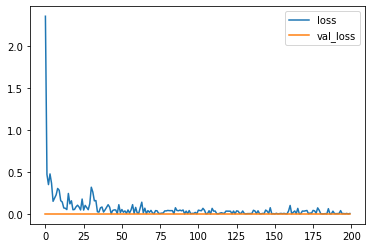

In [82]:
epochs = 200
history = model.fit(
    X_train, y_train,
    validation_split=0.3,
    batch_size=16,  
    epochs=epochs,
    verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [40]:
model = Sequential([
    Dense(6, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(2, activation='sigmoid'),  
])

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy,
              metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10


TypeError: ignored

In [ ]:
inputshape = (6,)
dense1 = tf.keras.layers.Dense(units = 4, kernel_initializer = 'random_normal')(inputshape)
dense2 = tf.keras.layers.Dense(units = 4, kernel_initializer = 'random_normal')(dense1)
out = tf.keras.layers.Dense(2, activation = 'softmax')(dense2)
model1 = tf.keras.Model(inputs = input, outputs = out)
model1.summary()

In [ ]:

df.iloc[1].shape

In [ ]:
def build_model():
    model = keras.Sequential([
            layers.Dense(10, activation=tf.nn.relu),
            layers.Dense(10, activation=tf.nn.relu),
            layers.Dense(1)
        ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='binarycross_entropy',
            optimizer=optimizer,
            metrics=['accuracy'])
    return model

model = build_model()
model.fit(X_train, y_train, epochs=100, steps_per_epoch=179)

In [ ]:
X_train = imgprop[][:,0 : 11]

In [ ]:
y_train = imgprop[][12]

In [ ]:
images_nr = np.array(images_nr)

In [ ]:
images_nr.shape

In [ ]:
path = os.path.join(Non_raveling_data,list_nr[0])

In [ ]:
path

In [ ]:
for i in range(10):
  img = io.imread(os.path.join(Non_raveling_data,list_nr[i]))
  io.imshow(img)
